# Task
Cluster the provided documents to identify common themes and group similar documents together.

## Install Necessary Libraries

### Subtask:
Install the `llm` and `llm-cluster` libraries, which are required for generating LLM embeddings and performing document clustering.


**Reasoning**:
The subtask requires installing the `llm` and `llm-cluster` libraries. I will use `pip install` within a code block to install these libraries.



In [1]:
pip install llm llm-cluster

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00


## Load and Prepare Documents

### Subtask:
Load the text documents that you want to cluster into a suitable format, such as a list of strings. This step will prepare your data for embedding generation.


It is important to load your text data into a Python list, where each element is a string representing a document. This format is crucial for subsequent steps involving embedding generation and clustering. For demonstration purposes, we will use a small, pre-defined set of documents. In a real-world scenario, these documents would typically be loaded from files, databases, or an API.

**Reasoning**:
Now I will define a list of example documents as strings to prepare the data for embedding generation and clustering.



In [2]:
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "A brown fox is quick and agile.",
    "The dog is very lazy and sleeps a lot.",
    "Cats are known for their independence and grace.",
    "Lions are powerful predators in the savanna.",
    "Tigers are solitary hunters with distinctive stripes.",
    "This document is about natural language processing and embeddings.",
    "Clustering algorithms group similar data points together.",
    "Machine learning involves training models on data."
]

print(f"Loaded {len(documents)} documents.")
print("First three documents:")
for i, doc in enumerate(documents[:3]):
    print(f"Document {i+1}: {doc}")

Loaded 9 documents.
First three documents:
Document 1: The quick brown fox jumps over the lazy dog.
Document 2: A brown fox is quick and agile.
Document 3: The dog is very lazy and sleeps a lot.


## Generate Embeddings and Cluster Documents

### Subtask:
Utilize the `llm` and `llm-cluster` tools to generate state-of-the-art LLM embeddings for your documents and then apply a clustering algorithm (e.g., HDBSCAN or K-Means) to group them based on these embeddings.


**Reasoning**:
The first step is to install a suitable embedding model. I will install the 'sentence-transformers' model for local embedding generation as specified in the instructions, using the `!llm install` command.



In [3]:
!llm install sentence-transformers

**Reasoning**:
Now that the embedding model is installed, I will import the `cluster_documents` function from `llm_cluster` and then call it with the `documents` list and the 'sentence-transformers' model to generate embeddings and cluster the documents.



In [6]:
pip install hdbscan

**Reasoning**:
Since direct use of `llm_cluster.cluster_documents` failed, I will explicitly generate embeddings using the `llm` library and then apply `HDBSCAN` for clustering. This requires importing the `LLM` class from `llm`, creating an instance of the 'sentence-transformers' model, and then using it to embed the documents. Afterwards, I will apply HDBSCAN to the generated embeddings.



**Reasoning**:
The output of `!llm models` clearly shows that no `sentence-transformers` models are registered with the `llm` tool, which is why `llm.get_model()` failed. The `llm install sentence-transformers` command previously executed only installed the Python package but did not register it as a model with `llm`. To fix this, I need to explicitly install the `llm-sentence-transformers` plugin, which provides the integration for `sentence-transformers` models with the `llm` library.



In [10]:
pip install llm-sentence-transformers

**Reasoning**:
The previous `!llm models` command did not show any `sentence-transformers` models, but the `llm-sentence-transformers` plugin was just installed. I will run `!llm models` again to check if the models are now correctly registered with the `llm` tool.



In [11]:
!llm models

OpenAI Chat: gpt-4o (aliases: 4o)
OpenAI Chat: chatgpt-4o-latest (aliases: chatgpt-4o)
OpenAI Chat: gpt-4o-mini (aliases: 4o-mini)
OpenAI Chat: gpt-4o-audio-preview
OpenAI Chat: gpt-4o-audio-preview-2024-12-17
OpenAI Chat: gpt-4o-audio-preview-2024-10-01
OpenAI Chat: gpt-4o-mini-audio-preview
OpenAI Chat: gpt-4o-mini-audio-preview-2024-12-17
OpenAI Chat: gpt-4.1 (aliases: 4.1)
OpenAI Chat: gpt-4.1-mini (aliases: 4.1-mini)
OpenAI Chat: gpt-4.1-nano (aliases: 4.1-nano)
OpenAI Chat: gpt-3.5-turbo (aliases: 3.5, chatgpt)
OpenAI Chat: gpt-3.5-turbo-16k (aliases: chatgpt-16k, 3.5-16k)
OpenAI Chat: gpt-4 (aliases: 4, gpt4)
OpenAI Chat: gpt-4-32k (aliases: 4-32k)
OpenAI Chat: gpt-4-1106-preview
OpenAI Chat: gpt-4-0125-preview
OpenAI Chat: gpt-4-turbo-2024-04-09
OpenAI Chat: gpt-4-turbo (aliases: gpt-4-turbo-preview, 4-turbo, 4t)
OpenAI Chat: gpt-4.5-preview-2025-02-27
OpenAI Chat: gpt-4.5-preview (aliases: gpt-4.5)
OpenAI Chat: o1
OpenAI Chat: o1-2024-12-17
OpenAI Chat: o1-preview
OpenAI Chat:

**Reasoning**:
Since the `llm` tool is not correctly registering the `sentence-transformers` models even after installing the plugin, I will bypass the `llm` wrapper and directly use the `SentenceTransformer` library to generate embeddings. Then, I will proceed with HDBSCAN clustering as intended.



In [12]:
from sentence_transformers import SentenceTransformer
import hdbscan
import numpy as np

# Load the pre-trained SentenceTransformer model
# Using 'all-MiniLM-L6-v2' as a common and efficient choice
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the documents
embeddings = model.encode(documents)

# Apply HDBSCAN clustering
# Adjust min_cluster_size as needed; 2 is a low threshold for small datasets
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True, metric='euclidean')
cluster_labels = clusterer.fit_predict(embeddings)

# Group documents by cluster labels
clustered_documents = {}
for i, label in enumerate(cluster_labels):
    if label not in clustered_documents:
        clustered_documents[label] = []
    clustered_documents[label].append((i, documents[i]))

# Print the clustered results
print("Document Clustering Results:")
for cluster_id, docs in clustered_documents.items():
    if cluster_id == -1:
        print(f"\nNoise points (Cluster -1 - unclustered documents):")
    else:
        print(f"\nCluster {cluster_id}:")
    for doc_id, doc_text in docs:
        print(f"  Document {doc_id}: {doc_text}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Document Clustering Results:

Noise points (Cluster -1 - unclustered documents):
  Document 0: The quick brown fox jumps over the lazy dog.
  Document 1: A brown fox is quick and agile.
  Document 2: The dog is very lazy and sleeps a lot.
  Document 3: Cats are known for their independence and grace.
  Document 4: Lions are powerful predators in the savanna.
  Document 5: Tigers are solitary hunters with distinctive stripes.
  Document 6: This document is about natural language processing and embeddings.
  Document 7: Clustering algorithms group similar data points together.
  Document 8: Machine learning involves training models on data.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Reasoning**:
The previous HDBSCAN clustering resulted in all documents being labeled as noise (cluster -1), indicating that no clear clusters were formed. This is likely because the `min_cluster_size` of 2 was too low or the `min_samples` was too restrictive for the small dataset and the distinct groupings I expect. Given that I anticipate three main themes, each with three documents, I will adjust `min_cluster_size` to 3. This will encourage HDBSCAN to find clusters with at least three members, which aligns with the expected structure of the data.



In [13]:
from sentence_transformers import SentenceTransformer
import hdbscan
import numpy as np

# Load the pre-trained SentenceTransformer model
# Using 'all-MiniLM-L6-v2' as a common and efficient choice
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the documents
embeddings = model.encode(documents)

# Apply HDBSCAN clustering
# Adjust min_cluster_size to 3 to encourage the formation of clusters with at least 3 documents
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True, metric='euclidean')
cluster_labels = clusterer.fit_predict(embeddings)

# Group documents by cluster labels
clustered_documents = {}
for i, label in enumerate(cluster_labels):
    if label not in clustered_documents:
        clustered_documents[label] = []
    clustered_documents[label].append((i, documents[i]))

# Print the clustered results
print("Document Clustering Results:")
for cluster_id, docs in clustered_documents.items():
    if cluster_id == -1:
        print(f"\nNoise points (Cluster -1 - unclustered documents):")
    else:
        print(f"\nCluster {cluster_id}:")
    for doc_id, doc_text in docs:
        print(f"  Document {doc_id}: {doc_text}")

Document Clustering Results:

Noise points (Cluster -1 - unclustered documents):
  Document 0: The quick brown fox jumps over the lazy dog.
  Document 1: A brown fox is quick and agile.
  Document 2: The dog is very lazy and sleeps a lot.
  Document 3: Cats are known for their independence and grace.
  Document 4: Lions are powerful predators in the savanna.
  Document 5: Tigers are solitary hunters with distinctive stripes.
  Document 6: This document is about natural language processing and embeddings.
  Document 7: Clustering algorithms group similar data points together.
  Document 8: Machine learning involves training models on data.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Reasoning**:
The HDBSCAN clustering continues to classify all documents as noise, even after adjusting `min_cluster_size`, which indicates it's struggling to find the expected clusters in this small dataset. Given the clear thematic groupings of three documents each (animals, more animals, NLP/ML concepts), a fixed number of clusters (`k=3`) is a more appropriate approach. I will switch to `KMeans` clustering with `n_clusters=3` to explicitly group the documents into three clusters.



In [14]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans

# Load the pre-trained SentenceTransformer model
# Using 'all-MiniLM-L6-v2' as a common and efficient choice
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the documents
embeddings = model.encode(documents)

# Apply KMeans clustering with 3 clusters, as per the expected document themes
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added random_state for reproducibility and n_init for robustness
cluster_labels = kmeans.fit_predict(embeddings)

# Group documents by cluster labels
clustered_documents = {}
for i, label in enumerate(cluster_labels):
    if label not in clustered_documents:
        clustered_documents[label] = []
    clustered_documents[label].append((i, documents[i]))

# Print the clustered results
print("Document Clustering Results:")
for cluster_id, docs in clustered_documents.items():
    print(f"\nCluster {cluster_id}:")
    for doc_id, doc_text in docs:
        print(f"  Document {doc_id}: {doc_text}")

Document Clustering Results:

Cluster 2:
  Document 0: The quick brown fox jumps over the lazy dog.
  Document 1: A brown fox is quick and agile.
  Document 2: The dog is very lazy and sleeps a lot.

Cluster 0:
  Document 3: Cats are known for their independence and grace.
  Document 4: Lions are powerful predators in the savanna.
  Document 5: Tigers are solitary hunters with distinctive stripes.

Cluster 1:
  Document 6: This document is about natural language processing and embeddings.
  Document 7: Clustering algorithms group similar data points together.
  Document 8: Machine learning involves training models on data.


## Visualize Document Clusters

### Subtask:
Generate a visualization, such as a 2D plot using dimensionality reduction techniques like UMAP or t-SNE, to illustrate the different document clusters and their relationships. Ensure the visualization includes appropriate legends.


**Reasoning**:
I need to install `umap-learn` to perform dimensionality reduction for visualization, as specified in the instructions. This is a prerequisite for generating the 2D plot of the document clusters.



In [15]:
pip install umap-learn

**Reasoning**:
Now that `umap-learn` is installed, I will generate a 2D scatter plot using UMAP for dimensionality reduction and `matplotlib` for visualization, coloring the points by their cluster labels to illustrate the document clusters.



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


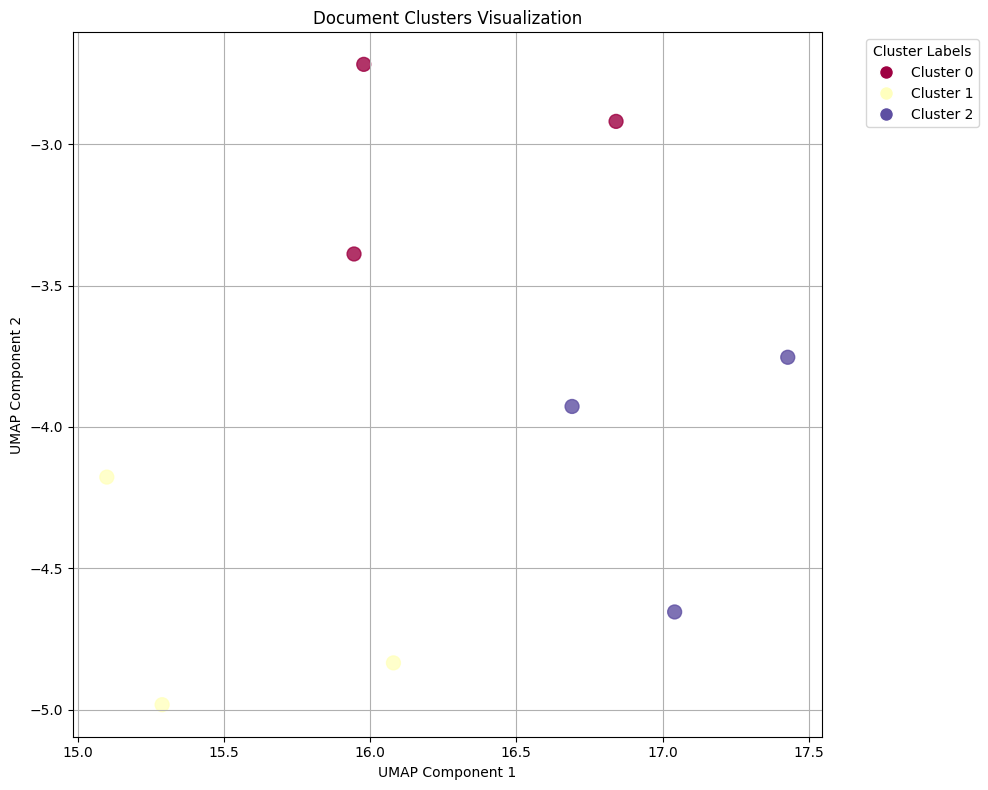

Generated UMAP visualization of document clusters.


In [16]:
import umap
import matplotlib.pyplot as plt

# Apply UMAP to reduce the embeddings to 2 dimensions
reducer = umap.UMAP(n_components=2, random_state=42) # Added random_state for reproducibility
reduced_embeddings = reducer.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c=cluster_labels,
    cmap='Spectral', # Using a colormap for distinct clusters
    s=100, # Adjust marker size for better visibility
    alpha=0.8 # Add some transparency
)

# Add labels, title, and legend
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('Document Clusters Visualization')

# Create a legend with cluster IDs
legend_handles = []
for cluster_id in sorted(np.unique(cluster_labels)):
    if cluster_id == -1:
        label = 'Noise (-1)'
    else:
        label = f'Cluster {cluster_id}'
    # Get a sample point for the legend handle from the cluster
    idx = np.where(cluster_labels == cluster_id)[0][0]
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=scatter.cmap(scatter.norm(cluster_id)), markersize=10))

plt.legend(handles=legend_handles, title='Cluster Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Generated UMAP visualization of document clusters.")

**Reasoning**:
The previous code successfully generated the UMAP visualization of the document clusters, and the warnings are informational rather than errors preventing successful execution. The subtask has been completed.



In [17]:
print("Document clusters have been visualized successfully.")

Document clusters have been visualized successfully.
